In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from scipy import interpolate
%matplotlib inline

In [2]:
plt.style.use(['no-latex'])
plt.rcParams.update({
    "font.family": "Sans",  
    "font.serif": ["DejaVu"],
"font.size": 25}) 

from pylab import *
rc('axes', linewidth=2)

In [3]:
## Nagao (2006a) Curves, big UV bump

Z = np.array([0.2, 0.5, 1.0, 2.0, 5.0, 10.0])
n5c4 = np.array([0.019, 0.044, 0.092, 0.199, 0.439, 0.712])
o4c4 = np.array([0.050, 0.043, 0.045, 0.058, 0.088, 0.115])
si4c4 = np.array([0.056, 0.075, 0.104, 0.158, 0.248,0.329])
nagao = o4c4 + si4c4

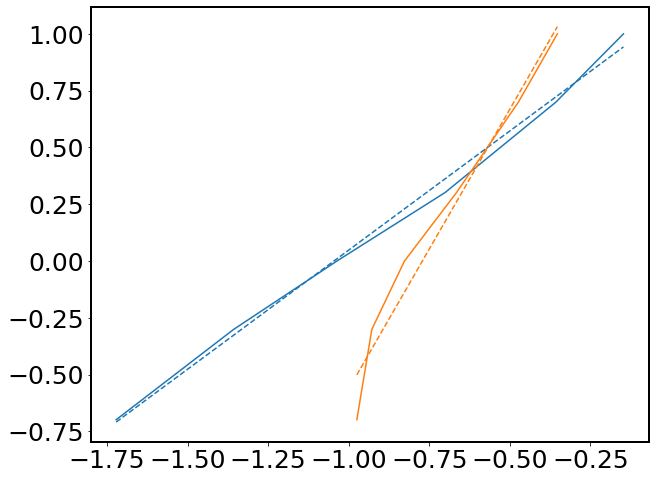

In [4]:
plt.figure(figsize=[10,8])

plt.plot(np.log10(n5c4), np.log10(Z), ms=8, label='NV/CIV')
plt.plot(np.log10(nagao), np.log10(Z), ms=8, label='NV/CIV')

import scipy.optimize as sop

def linear(ratio, a, b):
    return a + b * ratio

popt,pcov=sop.curve_fit(linear, np.log10(n5c4), np.log10(Z))
popt1,pcov1=sop.curve_fit(linear, np.log10(nagao), np.log10(Z))

def n_abundance(line_ratio):
    return linear(np.log10(line_ratio), popt[0], popt[1])

def alpha_abundance(line_ratio):
    return linear(np.log10(line_ratio), popt1[0], popt1[1])

plt.plot(np.log10(n5c4), n_abundance(n5c4), 'C0', ls='--',label='Mrk 817 fit')
plt.plot(np.log10(nagao), alpha_abundance(nagao), 'C1', ls='--',label='Mrk 817 fit')



In [5]:
## Sarkar (2021) Curves, De Rosa Temp
Fe = np.array([0.1, 0.5, 1, 5, 10])
logFeMg = np.array([0.54, 0.65, 0.71, 0.85, 0.93])

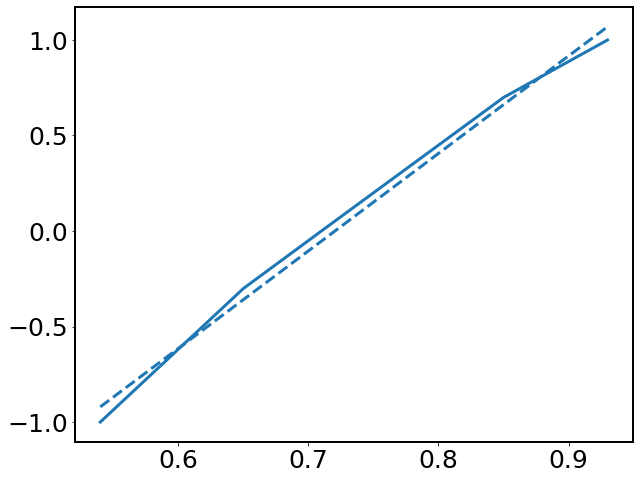

In [6]:
plt.figure(figsize=[10,8])


plt.plot(logFeMg, np.log10(Fe), lw=3)
#plt.yscale('log')

poptFe,pcovFe = sop.curve_fit(linear, logFeMg, np.log10(Fe))


def Fe_abundance(line_ratio):
    return linear(line_ratio, poptFe[0], poptFe[1])


plt.plot(logFeMg, Fe_abundance(logFeMg), 'C0', ls='--',label='Fefit', lw=3)



In [7]:
poptFe[0], poptFe[1]

(-3.675975978125731, 5.1026684508969264)

In [8]:
10**alpha_abundance(0.3)

4.092365561045085

In [9]:
popt[0], popt[1]

(1.0973282734622913, 1.0495772572669286)

In [10]:
popt1[0], popt1[1]

(1.9005566905630635, 2.464399788580613)

In [11]:
from numpy import nan
lai_z = np.array([6.620, 6.773, 6.702, 6.719, 6.565, 6.170, 5.830, 5.799, 6.586, 6.172])
lai_n5c4 = np.array([0.77, 0.49, 1.49, 0.50, 0.49, 0.76, 0.87, 0.98, 0.73, 0.96])
lai_n5c4_e = np.array([0.15, 0.09, 0.08, 0.08, 0.13, 0.05, 0.11, 0.06, 0.05, 0.13])
lai_nagao = np.array([0.27, 0.12, 0.66, 0.19, 0.16, 0.10, 0.34, 0.95, 0.36, 0.11])
lai_nagao_e = np.array([0.06, 0.05, 0.10, 0.09, 0.05, 0.05, 0.22, 0.10, 0.08, 0.04])

reduced_lai_nagao = np.array([3.31])
lai_nagao_ep = np.array([4.61-3.31])
lai_nagao_em = np.array([3.31-2.01])
shin_z = np.array([0.123, 0.035, 0.030, 0.031, 0.043, 0.036, 0.164, 0.035, 0.029, 0.206, 0.045, 0.167,\
                   0.357, 0.154, 0.234, 0.176, 0.165, 0.063, 0.048, 0.155, 0.087, 0.098, 0.114, 0.366,\
                   0.221, 0.267, 0.065, 0.371, 0.137, 0.030, 0.266, 0.119, 0.131, 0.325])
shin_n5 = np.array([26.8, 54.5, 45.0, 28.0, 62.7, 11.4, 29.2, 39.7, 66.3, 32.9, 12.2, 12.4, 29.7, 18.5,\
                   14.5, 35.9, 8.3, 15.0, 3.7, 64.3, 22.4, 9.5, 44.0, 8.6, 13.8, 36.0, 10.0, 32.9, 22.4, 40.8,\
                   36.9, 12.7, 11.0, 10.4])
shin_c4 = np.array([54.2, 227.2, 172.0, 56.4, 218.2, 87.4, 64.0, 292.0, 183.3, 59.5, 45.7, 19.1, 41.6, 34.4, 47.8,\
                   51.1, 72.9, 156.4, 11.4, 114.6, 34.7, 13.1, 55.0, 49.4, 43.1, 32.6, 13.2, 70.2, 49.0,\
                   187.5, 101.6, 30.7, 67.8, 8.0])
shin_si4 = np.array([8.7, 47.2, 22.1, 18.3, 34.5, 9.7, nan, 46.9, nan, 11.5, nan, nan, 11.3, nan, nan, nan, nan,\
                    47.5, nan, nan, nan, nan, 20.4, nan, 9.3, nan, 3.7, 8.3, 29.0, 25.1, nan, nan, nan, 4.4])
shin_n5c4 = shin_n5/shin_c4
shin_nagao = shin_si4/shin_c4

In [12]:
shin_nagao_mean = np.nanmean(shin_nagao)
shin_n5c4_mean = np.nanmean(shin_n5c4)

In [13]:
shin_n5c4_mean

0.45869556715377763

In [14]:
nagao_z = np.array([2.25, 2.75, 3.25, 3.75, 4.25])
zrange = np.array([0.25, 0.25, 0.25, 0.25, 0.25])

nagao_n5c4_a = np.array([0.506, 0.717, 0.887, 0.983, 1.145]) # 2-2.5
nagao_n5c4_b = np.array([0.561, 0.578, 0.858, 1.004, 1.248]) # 2.5-3
nagao_n5c4_c = np.array([nan, 0.635, 0.819, 1.034, 0.979]) # 3-3.5
nagao_n5c4_d = np.array([nan, 0.618, 0.856, 1.062, 1.006]) # 3.5-4
nagao_n5c4_e = np.array([nan, 0.724, 0.933, 1.075, nan]) # 4-4.5

nagao_nagao_a = np.array([0.256, 0.334, 0.375, 0.398, 0.419]) # 2-2.5
nagao_nagao_b = np.array([0.254, 0.252, 0.360, 0.401, 0.462]) # 2.5-3
nagao_nagao_c = np.array([nan, 0.279, 0.329, 0.402, 0.370]) # 3-3.5
nagao_nagao_d = np.array([nan, 0.261, 0.347, 0.395, 0.421]) # 3.5-4
nagao_nagao_e = np.array([nan, 0.349, 0.383, 0.409, nan]) # 4-4.5

nagao_n5c4 = np.array([np.mean(nagao_n5c4_a), np.mean(nagao_n5c4_b), np.nanmean(nagao_n5c4_c), np.nanmean(nagao_n5c4_d), np.nanmean(nagao_n5c4_e)])
nagao_nagao = np.array([np.mean(nagao_nagao_a), np.mean(nagao_nagao_b), np.nanmean(nagao_nagao_c), np.nanmean(nagao_nagao_d), np.nanmean(nagao_nagao_e)])

nagao_n5c4_lo = np.array([np.mean(nagao_n5c4_a[1:2]), np.mean(nagao_n5c4_b[1:2]), np.nanmean(nagao_n5c4_c[1:2]), np.nanmean(nagao_n5c4_d[1:2]), np.nanmean(nagao_n5c4_e[1:2])])
nagao_nagao_lo = np.array([np.mean(nagao_nagao_a[1:2]), np.mean(nagao_nagao_b[1:2]), np.nanmean(nagao_nagao_c[1:2]), np.nanmean(nagao_nagao_d[1:2]), np.nanmean(nagao_nagao_e[1:2])])



In [15]:
juarez_z = np.array([5.2])
juarez_zrange = np.array([1.2])
juarez_nagao = np.array([0.61, 0.34, 0.58, 0.32, 0.16, 0.29, 0.23, 0.97, 0.80, 0.63, 0.42, \
                        0.70, 0.35, 0.59, 0.40, 0.42, 0.41, 0.57, 0.63, 0.38, 0.57, 0.53, \
                        0.39, 0.37, 0.34, 0.54, 0.30, 0.23, 0.55, 0.29])
np.mean(juarez_nagao)

0.46366666666666667

In [16]:
xu_z = np.array([4.5, 5.0])
xu_zrange = np.array([0.25, 0.25])
xu_metal = np.array([5.01, 4.43])

In [17]:
# for i in range(len(shin_c4)):
#     print(shin_n5[i], shin_si4[i])

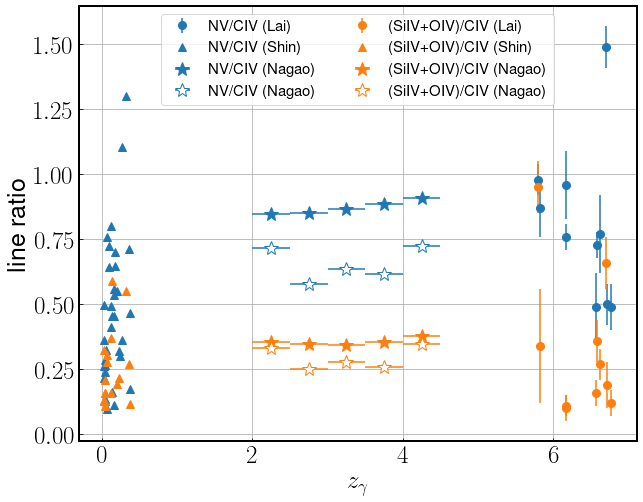

In [18]:
# import scipy.optimize as sop

# def powlaw(lam, x0, lam0) :
#     return x0 * ((lam/lam0) ** (4/3) - 1)

# popt,pcov=sop.curve_fit(powlaw, Mrk817_w, Mrk817_lag, sigma = Mrk817_lag_ep, bounds=([1e-5,0.], [3., 5000.]))

# popt1,pcov1=sop.curve_fit(powlaw, F9_w, F9_lag, bounds=([1e-5,0.], [3., 5000.]))

# popt2,pcov2=sop.curve_fit(powlaw, NGC4593_w, NGC4593_lag, bounds=([1e-5,0.], [3., 5000.]))

# lamb = np.linspace(1, 9000., 100)
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=[10,8])

plt.errorbar(lai_z, lai_n5c4, ms=8, yerr=lai_n5c4_e, fmt='o', c='C0', label='NV/CIV (Lai)')
plt.errorbar(shin_z, shin_n5c4, ms=8, fmt='^', c='C0', label='NV/CIV (Shin)')
plt.errorbar(nagao_z, nagao_n5c4, ms=15, xerr=zrange, c='C0', fmt='*', label='NV/CIV (Nagao)')
plt.errorbar(nagao_z, nagao_n5c4_lo, ms=15, xerr=zrange, c='C0', fmt='*', mfc='white', label='NV/CIV (Nagao)')

plt.errorbar(lai_z, lai_nagao, ms=8, yerr=lai_nagao_e, fmt='o', c='C1', label='(SiIV+OIV)/CIV (Lai)')
plt.errorbar(shin_z, shin_nagao, ms=8, fmt='^',c='C1',label='(SiIV+OIV)/CIV (Shin)')
plt.errorbar(nagao_z, nagao_nagao, ms=15, xerr=zrange, c='C1', fmt='*', label='(SiIV+OIV)/CIV (Nagao)')
plt.errorbar(nagao_z, nagao_nagao_lo, ms=15, xerr=zrange, c='C1', fmt='*', mfc='white', label='(SiIV+OIV)/CIV (Nagao)')


plt.tick_params(direction='in', which='both')

plt.ylabel(r'line ratio')
plt.xlabel(r'$z_{\gamma}$')
plt.legend(fontsize=15, ncol=2)
plt.grid()
plt.savefig('z_plot_line_ratio.png', dpi=300, facecolor='white', edgecolor='white');

In [62]:
zlo = np.array([0.03, 0.7, 4.5, 4.5, 5.7, 5.8, 5.9])
zhi = np.array([0.367, 2.3, 4.7, 5.1, 6.4, 6.4, 6.9])
zbin = (zlo + zhi)/2
zrange = zhi - zbin
zShin = np.array([0.367])
FeMgShin = 3.80
FeMgShin_corr = 3.63
FeMg = np.array([3.80, 3.13, 4.62, 2.95, 4.56, 3.03, 5.47])
FeMg_corr = np.array([3.63, 3.60, nan, 2.84, 4.37, 2.44, 5.11])
label = np.array(['Shin', 'Shen+11', 'Dietrich+03', 'De Rosa+11', 'Wang+22', 'De Rosa+11', 'Schindelr+20'])
color = np.array(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

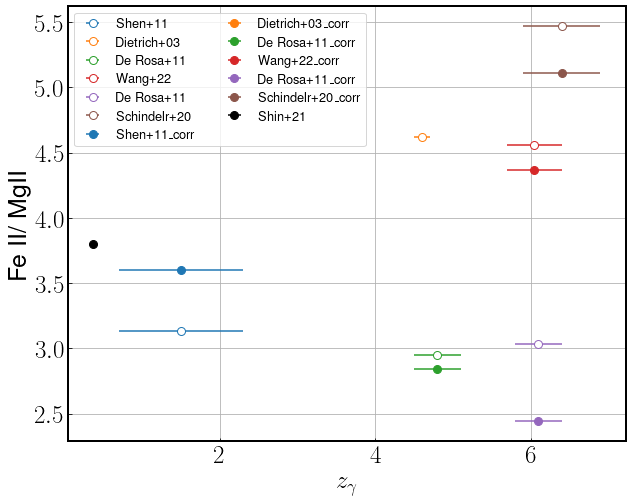

In [44]:
plt.figure(figsize=[10,8])

for author in range(len(FeMg)):
    plt.errorbar(zbin[author], FeMg[author], ms=8, xerr=zrange[author], fmt='o', label=label[author],
                 mfc='white', c=color[author])
    
for author in range(len(FeMg)):
    plt.errorbar(zbin[author], FeMg_corr[author], ms=8, xerr=zrange[author], fmt='o', label=f'{label[author]}_corr',
                 c=color[author])
    
ze = [zShin,np.array(0)]

plt.errorbar(zShin, FeMgShin, ms=8, xerr=0, fmt='o', label=f'Shin+21',
                 c='k')

# plt.errorbar(zShin, FeMgShin_corr, ms=8, xerr=[zShin,np.array(0)], fmt='o', label=f'Shin+21_corr',
#                  c='k')

plt.tick_params(direction='in', which='both')

plt.ylabel(r'Fe II/ MgII')
plt.xlabel(r'$z_{\gamma}$')
plt.legend(fontsize=13, ncol=2)
plt.grid()
plt.savefig('z_plot_FeMg.png', dpi=300, facecolor='white', edgecolor='white');

In [21]:
np.full(6, 0.5)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

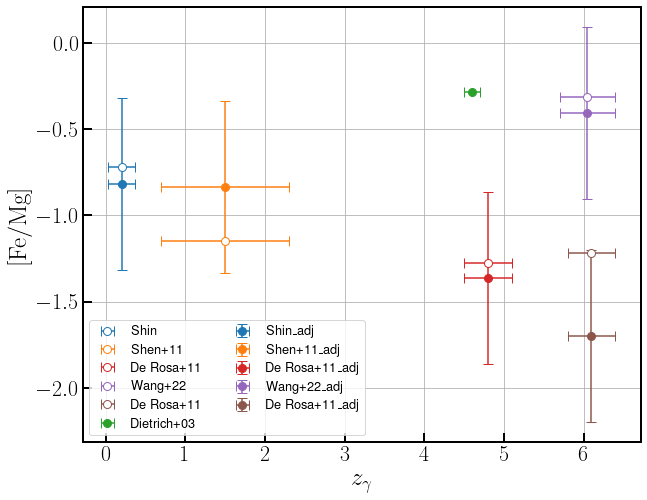

In [88]:
plt.figure(figsize=[10,8])

for author in [0,1,3,4,5]:
    plt.errorbar(zbin[author], Fe_abundance(np.log10(FeMg[author])), ms=8, xerr=zrange[author], capsize=5,
                 fmt='o', label=label[author],mfc='white', c=color[author])
for author in [2]:
    plt.errorbar(zbin[author], Fe_abundance(np.log10(FeMg[author])), ms=8, xerr=zrange[author], capsize=5,
                 fmt='o', label=label[author], c=color[author])

for author in [0,1,3,4,5]:
    plt.errorbar(zbin[author], Fe_abundance(np.log10(FeMg_corr[author])), ms=8, xerr=zrange[author], 
                 yerr=0.5, capsize=5, fmt='o', label=f'{label[author]}_adj', c=color[author])

# plt.errorbar(zShin, Fe_abundance(np.log10(FeMgShin)), ms=8, xerr=0.367, fmt='o', label=f'Shin+21',
#                 mfc='white', c='k', capsize=5, xuplims=True)
# plt.errorbar(zShin, Fe_abundance(np.log10(FeMgShin_corr)), ms=8, xerr=0.367, fmt='o', label=f'Shin+21',
#                 c='k', yerr=0.5, capsize=5, xuplims=True)

plt.tick_params(direction='in', which='both')

plt.ylabel(r'$\rm [Fe/Mg]$')
plt.xlabel(r'$z_{\gamma}$')
plt.legend(fontsize=13, ncol=2)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=22,length=9,width=2,direction='in')
plt.savefig('z_plot_Fe_abundance.png', dpi=300, facecolor='white', edgecolor='white', bbox_inches='tight');

ValueError: 'xerr' (shape: (7,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (5,))

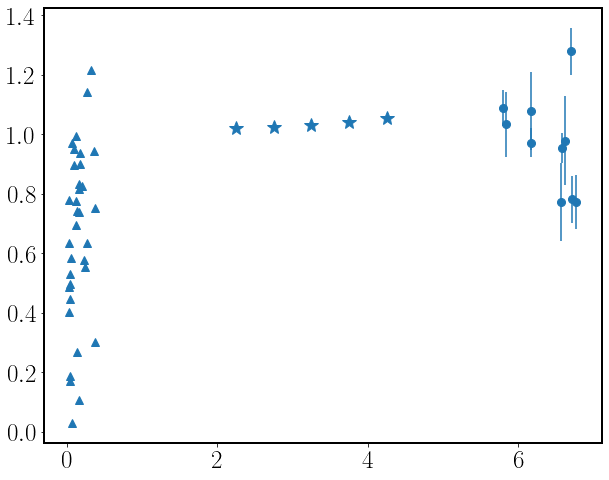

In [69]:
plt.figure(figsize=[10,8])


plt.errorbar(lai_z, n_abundance(lai_n5c4), ms=8, yerr=lai_n5c4_e, fmt='o', c='C0', label='NV/CIV (Lai)')
plt.errorbar(shin_z, n_abundance(shin_n5c4), ms=8, fmt='^', c='C0', label='NV/CIV (Shin)')
plt.errorbar(nagao_z, n_abundance(nagao_n5c4), ms=15, xerr=zrange, c='C0', fmt='*', label='NV/CIV (Nagao)')

plt.errorbar(lai_z, alpha_abundance(lai_nagao), ms=8, yerr=lai_nagao_e, fmt='o', c='C1', label='(SiIV+OIV)/CIV (Lai)')
plt.errorbar(shin_z, alpha_abundance(shin_nagao), ms=8, fmt='^',c='C1',label='(SiIV+OIV)/CIV (Shin)')
plt.errorbar(nagao_z, alpha_abundance(nagao_nagao), ms=15, xerr=zrange, c='C1', fmt='*', label='(SiIV+OIV)/CIV (Nagao)')

plt.ylabel(r'$\log Z/Z_{\odot}$')
plt.xlabel(r'$z_{\gamma}$')
plt.legend(fontsize=15, ncol=2)
plt.grid()
plt.savefig('z_plot_abundance.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
plt.figure(figsize=[10,8])

# plt.scatter(lai_z, n_abundance(lai_n5c4), label='Lai NV/CIV')
# plt.scatter(lai_z, alpha_abundance(lai_nagao), label='Lai SiIV/CIV')
# plt.errorbar(nagao_z, alpha_abundance(nagao_nagao), label='Nagao SiIV/CIV')

# plt.scatter(shin_z, n_abundance(shin_n5c4), label='Shin NV/CIV')
# plt.scatter(shin_z, alpha_abundance(shin_nagao), label='Shin SiIV/CIV')
#plt.errorbar(lai_z, lai_nagao, ms=8, yerr=lai_nagao_e, fmt='o', label='(SiIV+OIV)/CIV')

# plt.errorbar(np.mean(lai_z), np.mean(n_abundance(lai_n5c4)), ms=8, capsize=4,
#               xerr=3*np.std(lai_z), yerr=np.std(n_abundance(lai_n5c4)/np.sqrt(len(lai_n5c4))), fmt='o', c='C0', label='NV/CIV (Lai)')

shin_redshift = (np.min(shin_z) + np.max(shin_z))/2
shin_zp = np.max(shin_z) - shin_redshift
shin_zm = shin_redshift - np.min(shin_z)

plt.errorbar(np.mean(lai_z), np.log10(9.865), ms=8, capsize=4,
               xerr=3*np.std(lai_z), yerr=[[0.18], [0.13]], fmt='o', c='C0', label='NV/CIV (Lai)')

plt.errorbar(shin_redshift, np.mean(n_abundance(shin_n5c4)), ms=8, capsize=4,
             xerr=[[shin_zm], [shin_zp]], yerr=np.std(n_abundance(shin_n5c4)/np.sqrt(len(shin_n5c4))), fmt='^', c='C0', label='NV/CIV (Shin)')

# plt.errorbar(np.mean(shin_z), np.mean(shin_n5c4_mean), ms=8, capsize=4,
#              xerr=3*np.std(shin_z), yerr=np.std(n_abundance(shin_n5c4)/np.sqrt(len(shin_n5c4))), fmt='^', c='C2', label='NV/CIV (Shin)')

plt.errorbar(nagao_z, n_abundance(nagao_n5c4), ms=12, capsize=4,
             xerr=zrange, c='C0', fmt='*', label='NV/CIV (Nagao)')

plt.errorbar(nagao_z, n_abundance(nagao_n5c4_lo), ms=12, capsize=4,
             xerr=zrange, c='C0', mfc='white', fmt='*')



# plt.errorbar(np.mean(lai_z), np.mean(alpha_abundance(lai_nagao)), ms=8, capsize=4,
#              xerr=3*np.std(lai_z), yerr=np.std(n_abundance(lai_nagao)/np.sqrt(len(lai_nagao))), fmt='o', c='C1', label='(SiIV+OIV)/CIV (Lai)')

plt.errorbar(np.mean(lai_z), np.log10(reduced_lai_nagao), ms=8, capsize=4,
              xerr=3*np.std(lai_z), yerr=np.log10([lai_nagao_ep, lai_nagao_em]), fmt='o', c='C1', label='(SiIV+OIV)/CIV (Lai)')

plt.errorbar(shin_redshift, np.nanmean(alpha_abundance(shin_nagao)), ms=8, capsize=4,
             xerr=[[shin_zm], [shin_zp]],yerr=np.nanstd(n_abundance(shin_nagao)/np.sqrt(len(shin_nagao))), fmt='^',c='C1',label='(SiIV+OIV)/CIV (Shin)')

plt.errorbar(shin_redshift, alpha_abundance(shin_nagao_mean), ms=8, capsize=4,
             xerr=[[shin_zm], [shin_zp]],yerr=np.nanstd(n_abundance(shin_nagao)/np.sqrt(len(shin_nagao))), fmt='^',c='C2',label='(SiIV+OIV)/CIV (Shin)')

plt.errorbar(nagao_z, alpha_abundance(nagao_nagao), ms=12, capsize=4,
             xerr=zrange, c='C1', fmt='*', label='(SiIV+OIV)/CIV (Nagao)')

plt.errorbar(nagao_z, alpha_abundance(nagao_nagao_lo), ms=12, capsize=5,
             xerr=zrange, c='C1', mfc='white', fmt='*')

plt.errorbar(juarez_z, alpha_abundance(np.mean(juarez_nagao)), ms=10, capsize=5,
             xerr=juarez_zrange, c='C3', fmt='D')

plt.tick_params(direction='in', which='both')
plt.ylabel(r'$\log Z_{\alpha}/Z_{\odot}$')
plt.xlabel(r'$z_{\gamma}$')
plt.legend(fontsize=12, loc='best', ncol=3)
plt.ylim(0.0, 1.4)
plt.grid()
plt.tick_params(axis='both', which='major',length=9,width=1.5,direction='in')
plt.savefig('z_plot_abundance_binned.png', dpi=300, facecolor='white', edgecolor='white');

In [70]:
reduced_lai_nagao

array([3.31])

In [71]:
len(lai_z)

10

<ErrorbarContainer object of 3 artists>

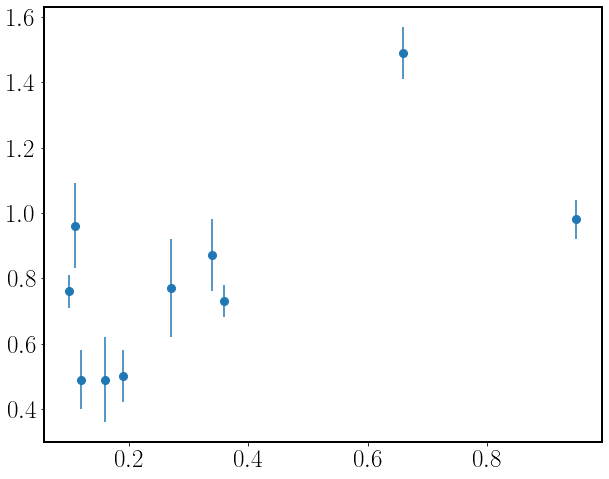

In [72]:
plt.figure(figsize=[10,8])

plt.errorbar(lai_nagao, lai_n5c4, ms=8, yerr=lai_n5c4_e, fmt='o', label='NV/CIV')

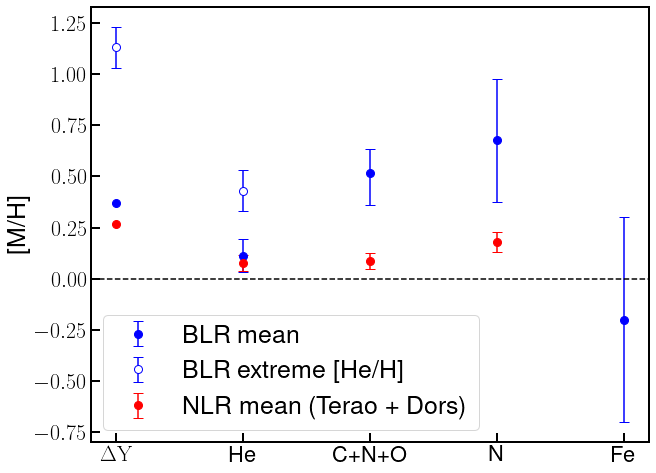

In [85]:
plt.figure(figsize=[10,8])
from pylab import *
rc('axes', linewidth=2)
elements = [r'$\Delta \rm Y$', 'He', 'C+N+O', 'N', 'Fe']

Y0 = 0.083
blr = np.array([np.log10((0.13-Y0)/0.02), np.log10(1.3), np.log10(3.3), np.log10(3.3*1.44), -0.2])
blr_extreme = np.array([np.log10(0.27/0.02), np.log10(2.7), nan, nan, nan])

nlr = np.array([np.log10((0.12-Y0)/0.02), np.log10(1.2), np.log10(1.226), 0.18, nan])

uncp = np.array([nan, np.log10(1.2), np.log10(1.3),np.log10(2),0.5])
uncm = np.array([nan, np.log10(1.2), np.log10(1.43),np.log10(2),0.5])

uncp_nlr = np.array([nan, np.log10(1.09), 0.04, 0.05, nan])
uncm_nlr = np.array([nan, np.log10(1.102), 0.04, 0.05, nan])

plt.errorbar(elements, blr, ms=8, capsize=5, yerr=[uncm, uncp], fmt='o', c='b', label='BLR mean')
plt.errorbar(elements, blr_extreme, ms=8, capsize=5, yerr=0.1, fmt='o', c='b', mfc='white', label='BLR extreme [He/H]')

plt.errorbar(elements, nlr, ms=8, capsize=5, yerr=[uncm_nlr, uncp_nlr], fmt='o', c='r', label='NLR mean (Terao + Dors)')

plt.axhline(y=0, ls='--', c='k')
plt.ylabel('[M/H]')
plt.tick_params(direction='in', which='both')
plt.legend(loc='best')
plt.tick_params(axis='both', which='major', labelsize=22,length=9,width=2,direction='in')
plt.savefig('best_guess_abundance.png', dpi=300, facecolor='white', edgecolor='white');


In [74]:
terao = np.array([1.2, 2.1, 1.4, 1.4, 2.0, 0.7, 0.7, 0.9, 0.7, 1.3, 1.4, 1.1, 0.6, 1.3, 1.6])

In [75]:
np.std(terao)/np.sqrt(len(terao))

0.11449082123973149

In [76]:
np.mean(terao)

1.2266666666666668

In [77]:
dors = np.array([7.5,7.5, 7.7, 7.7,\
                 7.9,7.9,7.9,7.9,7.9,7.9,7.9,7.9,7.9,\
                 8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,\
                 8.3,8.3,8.3,8.3,8.3,8.3,8.3,8.3,8.3,8.3,8.3,\
                 8.5,8.5, 8.7, 8.7])
len(dors)
                 

44

In [78]:
np.std(dors)/np.sqrt(len(dors))

0.0385451036940215

In [79]:
np.mean(dors) - 7.93 # 7.93 being solar nitrogen abundance 12+log(N/H)

0.17909090909090963

In [80]:
SiIV_OIV = np.array([1.29, 1.77, 3.78, 2.45, 2.90, 3.20, nan, 2.47, 3.58, 1.52, \
                     2.28, 3.64, 3.44, nan, 4.92])
CIV = np.array([1.58, 3.66, 5.43, 3.50, 5.74, 4.50, 1.50, 2.25, 6.09, 2.55, \
                  5.86, 5.55, 7.57, nan, 5.34])
len(SiIV_OIV/CIV)

15

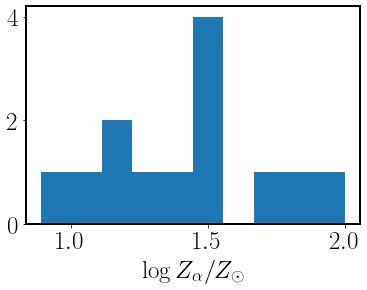

In [81]:
plt.hist((alpha_abundance(SiIV_OIV/CIV)))
plt.xlabel(r'$\log Z_{\alpha}/Z_{\odot}$');

In [82]:
Hbeta = np.array([53, 74, 68, 57, 83, 59, 31, 44, 34, 63, 82, 78, 117, 108, 94])
OIII = np.array([4.5, 19.8, 16.3, 13.7, 16.8, 15.1, 0.4, 4.7, 5.5, 10.7, 5.4, 15.2, 21.0, 33.9, 5.5])
RFeII = np.array([1.13, 0.31, 0.65, 0.65, 0.52, 0.62, 1.00, 1.29, 0.29, 0.98, 0.64, 0.04, 0.24, 0.71, 0.21])
len(Hbeta)

15

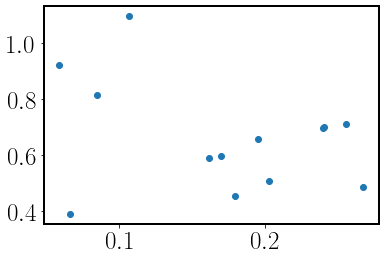

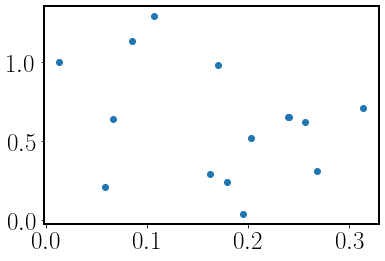

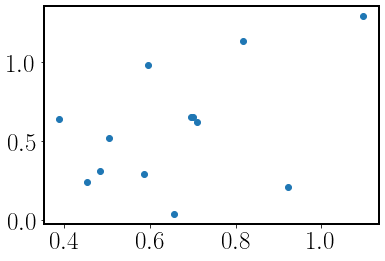

In [83]:
plt.figure(figsize=[6,4])
plt.scatter(OIII/Hbeta, SiIV_OIV/CIV)

plt.figure(figsize=[6,4])
plt.scatter(OIII/Hbeta, RFeII)

plt.figure(figsize=[6,4])
plt.scatter(SiIV_OIV/CIV, RFeII)